In [56]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from sklearn import svm
from scipy.stats import norm
import matplotlib.pyplot as plt

### Read data from files

In [57]:
companies = ['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DWDP','XOM',
             'GE','GS','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT',
             'NKE','PFE','PG','TRV','UNH','UTX','VZ','V','WMT','DIS']

df = None
for company in companies:
    temp_df = pd.read_excel('data\{}.xlsx'.format(company,na_value='nan'))
    if df is None:
        df = temp_df
    else:
        df = df.append(temp_df,ignore_index = True)
    
# rename variables
df = df.rename(index=str,columns={'OptType':'CallPut','Spot':'S0','Strike':'K','Rate':'rd','DvYd':'q','IVM':'sigma','DyEx':'T','Mid':'Option Price'})

In [ ]:
df.shape

In [82]:
# drop Ticker and Volm to make the dataset
dataset = df.drop(labels=['Ticker','Volm','sigma'],axis=1)
#dataset = dataset[['CallPut','K','rd','q','T','S0','S1','S2','S3','S4','S5','S6','Option Price']]
#dataset = dataset[['CallPut','K','rd','q','T','S0','Option Price']]

# column names
colname = dataset.columns.values
print('Input Varaibles: ')
print(dataset.columns.values[:-1])
print("Output Variable: ")
print(dataset.columns.values[-1])

# drop sigma=0
#dataset = dataset[dataset['sigma']!=0]
# transform T to year
dataset['T'] = dataset['T']/365
# change rd,q,sigma into percent
dataset['rd'] = dataset['rd']/100
dataset['q'] = dataset['q']/100
#dataset['sigma'] = dataset['sigma']/100

# transform dataframe into numpy array and shuffle the data
dataset = np.array(dataset)
np.random.shuffle(dataset)

X = dataset[:,:-1]
Y = dataset[:,-1].reshape(-1,1)

# normalize X
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
#X = (X-np.mean(X,axis=0))

Input Varaibles: 
['CallPut' 'S0' 'K' 'rd' 'q' 'T' 'S249' 'S248' 'S247' 'S246' 'S245' 'S244'
 'S243' 'S242' 'S241' 'S240' 'S239' 'S238' 'S237' 'S236' 'S235' 'S234'
 'S233' 'S232' 'S231' 'S230' 'S229' 'S228' 'S227' 'S226' 'S225' 'S224'
 'S223' 'S222' 'S221' 'S220' 'S219' 'S218' 'S217' 'S216' 'S215' 'S214'
 'S213' 'S212' 'S211' 'S210' 'S209' 'S208' 'S207' 'S206' 'S205' 'S204'
 'S203' 'S202' 'S201' 'S200' 'S199' 'S198' 'S197' 'S196' 'S195' 'S194'
 'S193' 'S192' 'S191' 'S190' 'S189' 'S188' 'S187' 'S186' 'S185' 'S184'
 'S183' 'S182' 'S181' 'S180' 'S179' 'S178' 'S177' 'S176' 'S175' 'S174'
 'S173' 'S172' 'S171' 'S170' 'S169' 'S168' 'S167' 'S166' 'S165' 'S164'
 'S163' 'S162' 'S161' 'S160' 'S159' 'S158' 'S157' 'S156' 'S155' 'S154'
 'S153' 'S152' 'S151' 'S150' 'S149' 'S148' 'S147' 'S146' 'S145' 'S144'
 'S143' 'S142' 'S141' 'S140' 'S139' 'S138' 'S137' 'S136' 'S135' 'S134'
 'S133' 'S132' 'S131' 'S130' 'S129' 'S128' 'S127' 'S126' 'S125' 'S124'
 'S123' 'S122' 'S121' 'S120' 'S119' 'S118' 'S117' 'S116

### Train test split

In [83]:
test_ratio = 0.2
num_test = int(test_ratio*dataset.shape[0])
X_test = X[:num_test]
X_train = X[num_test:]
Y_test = Y[:num_test]
Y_train = Y[num_test:]

### Train the Neural Network

In [125]:
model = Sequential()
#model.add(BatchNormalization(input_shape=[7]))
model.add(Dense(256, input_shape = [X_train.shape[1]], activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation ='relu'))
model.compile(optimizer='RMSProp', loss='mean_squared_error')
model.summary()

hist = model.fit(x=X_train,y=Y_train, epochs=1000, batch_size=128, validation_split=0.2, verbose=1,shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 256)               65536     
_________________________________________________________________
dense_100 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_101 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 257       
Total params: 197,377
Trainable params: 197,377
Non-trainable params: 0
_________________________________________________________________
Train on 9081 samples, validate on 2271 samples
Epoch 1/1000
9081/9081 [==============================] - 2s 222us/step - loss: 669.0971 - val_loss: 589.8738
Epoch 2/1000
9081/9081 [==============================] - 1s 73us/step - loss: 607.1191 - val_loss: 526.1922
E

9081/9081 [==============================] - 1s 71us/step - loss: 22.6123 - val_loss: 8.5060
Epoch 143/1000
9081/9081 [==============================] - 1s 68us/step - loss: 22.9531 - val_loss: 28.4611
Epoch 144/1000
9081/9081 [==============================] - 1s 69us/step - loss: 20.9347 - val_loss: 6.5104
Epoch 145/1000
9081/9081 [==============================] - 1s 69us/step - loss: 23.1451 - val_loss: 6.9450
Epoch 146/1000
9081/9081 [==============================] - 1s 67us/step - loss: 23.9988 - val_loss: 5.8474
Epoch 147/1000
9081/9081 [==============================] - 1s 70us/step - loss: 22.1739 - val_loss: 10.2267
Epoch 148/1000
9081/9081 [==============================] - 1s 73us/step - loss: 21.4382 - val_loss: 12.4742
Epoch 149/1000
9081/9081 [==============================] - 1s 68us/step - loss: 21.8367 - val_loss: 28.5939
Epoch 150/1000
9081/9081 [==============================] - 1s 70us/step - loss: 18.7784 - val_loss: 5.9022
Epoch 151/1000
9081/9081 [=============

9081/9081 [==============================] - 1s 69us/step - loss: 10.8651 - val_loss: 6.1018
Epoch 293/1000
9081/9081 [==============================] - 1s 69us/step - loss: 12.4428 - val_loss: 17.2432
Epoch 294/1000
9081/9081 [==============================] - 1s 68us/step - loss: 12.1252 - val_loss: 29.1498
Epoch 295/1000
9081/9081 [==============================] - 1s 70us/step - loss: 10.5838 - val_loss: 17.0098
Epoch 296/1000
9081/9081 [==============================] - 1s 68us/step - loss: 12.1140 - val_loss: 6.3169
Epoch 297/1000
9081/9081 [==============================] - 1s 71us/step - loss: 11.8658 - val_loss: 7.5075
Epoch 298/1000
9081/9081 [==============================] - 1s 68us/step - loss: 11.9769 - val_loss: 8.7460
Epoch 299/1000
9081/9081 [==============================] - 1s 68us/step - loss: 12.4362 - val_loss: 4.8384
Epoch 300/1000
9081/9081 [==============================] - 1s 68us/step - loss: 11.7740 - val_loss: 13.9875
Epoch 301/1000
9081/9081 [=============

9081/9081 [==============================] - 1s 69us/step - loss: 10.2116 - val_loss: 5.6634
Epoch 444/1000
9081/9081 [==============================] - 1s 89us/step - loss: 8.0417 - val_loss: 11.9514
Epoch 445/1000
9081/9081 [==============================] - 1s 89us/step - loss: 8.6069 - val_loss: 2.8848
Epoch 446/1000
9081/9081 [==============================] - 1s 88us/step - loss: 9.2376 - val_loss: 10.8051
Epoch 447/1000
9081/9081 [==============================] - 1s 88us/step - loss: 8.5198 - val_loss: 5.5504
Epoch 448/1000
9081/9081 [==============================] - 1s 90us/step - loss: 8.2606 - val_loss: 7.3136
Epoch 449/1000
9081/9081 [==============================] - 1s 90us/step - loss: 9.0291 - val_loss: 20.9600
Epoch 450/1000
9081/9081 [==============================] - 1s 91us/step - loss: 9.1538 - val_loss: 18.7826
Epoch 451/1000
9081/9081 [==============================] - 1s 90us/step - loss: 9.8858 - val_loss: 3.2882
Epoch 452/1000
9081/9081 [=====================

9081/9081 [==============================] - 1s 96us/step - loss: 7.8515 - val_loss: 6.6654
Epoch 596/1000
9081/9081 [==============================] - 1s 108us/step - loss: 7.2202 - val_loss: 5.8474
Epoch 597/1000
9081/9081 [==============================] - 1s 108us/step - loss: 6.6305 - val_loss: 4.5638
Epoch 598/1000
9081/9081 [==============================] - 1s 110us/step - loss: 6.7179 - val_loss: 8.1732
Epoch 599/1000
9081/9081 [==============================] - 1s 108us/step - loss: 7.5156 - val_loss: 6.7837
Epoch 600/1000
9081/9081 [==============================] - 1s 107us/step - loss: 7.0621 - val_loss: 8.3937
Epoch 601/1000
9081/9081 [==============================] - 1s 99us/step - loss: 6.9884 - val_loss: 4.9507
Epoch 602/1000
9081/9081 [==============================] - 1s 88us/step - loss: 7.9701 - val_loss: 7.0225
Epoch 603/1000
9081/9081 [==============================] - 1s 68us/step - loss: 6.4754 - val_loss: 18.4273
Epoch 604/1000
9081/9081 [====================

9081/9081 [==============================] - 1s 94us/step - loss: 6.1454 - val_loss: 4.8037
Epoch 672/1000
9081/9081 [==============================] - 1s 97us/step - loss: 6.7022 - val_loss: 5.2402
Epoch 673/1000
9081/9081 [==============================] - 1s 107us/step - loss: 6.3031 - val_loss: 5.7415
Epoch 674/1000
9081/9081 [==============================] - 1s 85us/step - loss: 6.7955 - val_loss: 9.3044
Epoch 675/1000
9081/9081 [==============================] - 1s 66us/step - loss: 6.7937 - val_loss: 7.6090
Epoch 676/1000
9081/9081 [==============================] - 1s 66us/step - loss: 7.1446 - val_loss: 31.7013
Epoch 677/1000
9081/9081 [==============================] - 1s 110us/step - loss: 6.5434 - val_loss: 9.2293
Epoch 678/1000
9081/9081 [==============================] - 1s 108us/step - loss: 5.8706 - val_loss: 6.6299
Epoch 679/1000
9081/9081 [==============================] - 1s 110us/step - loss: 6.5565 - val_loss: 11.8000
Epoch 680/1000
9081/9081 [====================

9081/9081 [==============================] - 1s 109us/step - loss: 6.1949 - val_loss: 7.3278
Epoch 748/1000
9081/9081 [==============================] - 1s 108us/step - loss: 6.2754 - val_loss: 7.0510
Epoch 749/1000
9081/9081 [==============================] - 1s 107us/step - loss: 5.6565 - val_loss: 9.1138
Epoch 750/1000
9081/9081 [==============================] - 1s 110us/step - loss: 5.9142 - val_loss: 9.0012
Epoch 751/1000
9081/9081 [==============================] - 1s 108us/step - loss: 4.6889 - val_loss: 9.9639
Epoch 752/1000
9081/9081 [==============================] - 1s 108us/step - loss: 6.8759 - val_loss: 8.3260
Epoch 753/1000
9081/9081 [==============================] - 1s 97us/step - loss: 5.5322 - val_loss: 7.2332
Epoch 754/1000
9081/9081 [==============================] - 1s 97us/step - loss: 5.7298 - val_loss: 5.1243
Epoch 755/1000
9081/9081 [==============================] - 1s 77us/step - loss: 6.4406 - val_loss: 11.4345
Epoch 756/1000
9081/9081 [===================

9081/9081 [==============================] - 1s 71us/step - loss: 4.8070 - val_loss: 9.0745
Epoch 900/1000
9081/9081 [==============================] - 1s 74us/step - loss: 5.8181 - val_loss: 12.1040
Epoch 901/1000
9081/9081 [==============================] - 1s 74us/step - loss: 5.4992 - val_loss: 22.7855
Epoch 902/1000
9081/9081 [==============================] - 1s 78us/step - loss: 5.6220 - val_loss: 6.9223
Epoch 903/1000
9081/9081 [==============================] - 1s 76us/step - loss: 5.4602 - val_loss: 29.9560
Epoch 904/1000
9081/9081 [==============================] - 1s 77us/step - loss: 5.1467 - val_loss: 2.3858
Epoch 905/1000
9081/9081 [==============================] - 1s 77us/step - loss: 5.2440 - val_loss: 7.2303
Epoch 906/1000
9081/9081 [==============================] - 1s 78us/step - loss: 5.2684 - val_loss: 7.4643
Epoch 907/1000
9081/9081 [==============================] - 1s 76us/step - loss: 5.3767 - val_loss: 2.2844
Epoch 908/1000
9081/9081 [=======================

### Train and cross validation mean squared error

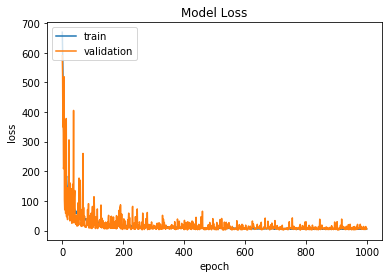

In [126]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

### Evaluate test set

In [127]:
predicted = model.predict(X_test)

In [128]:
loss=model.evaluate(x=X_test,y=Y_test)
print(loss)

2838/2838 [==============================] - 0s 71us/step
1.964294451319726


In [129]:
def f(x):
    return x

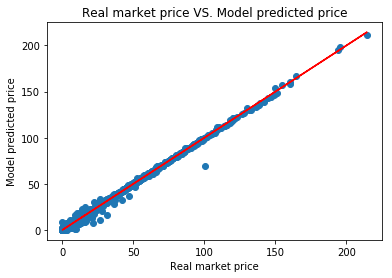

In [130]:
plt.plot(Y_test,predicted,'o')
plt.plot(Y_test,f(Y_test),'r-')
plt.title('Real market price VS. Model predicted price')
plt.xlabel('Real market price')
plt.ylabel('Model predicted price')
plt.show()

In [131]:
diff = {}
for i,pred in enumerate(predicted):
    diff[i]=abs(pred-Y_test[i])
diff = zip(diff.values(),diff.keys())
top10 = sorted(diff)[:10]
print("Top 10 matches\n")
for item in top10:
    ind = item[1]
    print("Real Market Price is: {}".format(Y_test[ind]))
    print("Model Predicted Price is: {}\n".format(predicted[ind]))

Top 10 matches

Real Market Price is: [20.64999962]
Model Predicted Price is: [20.649878]

Real Market Price is: [2.84000015]
Model Predicted Price is: [2.8402543]

Real Market Price is: [33.57500076]
Model Predicted Price is: [33.575542]

Real Market Price is: [43.79999924]
Model Predicted Price is: [43.79839]

Real Market Price is: [0.21000001]
Model Predicted Price is: [0.20825386]

Real Market Price is: [69.09999847]
Model Predicted Price is: [69.09789]

Real Market Price is: [18.25]
Model Predicted Price is: [18.247805]

Real Market Price is: [33.125]
Model Predicted Price is: [33.127388]

Real Market Price is: [1.04999995]
Model Predicted Price is: [1.0524255]

Real Market Price is: [32.55000305]
Model Predicted Price is: [32.54751]



In [132]:
diff = {}
for i,pred in enumerate(predicted):
    diff[i]=abs(pred-Y_test[i])
diff = zip(diff.values(),diff.keys())
worst10 = sorted(diff,reverse=True)[:10]
print("Worst 10 matches\n")
for item in worst10:
    ind = item[1]
    print("Real Market Price is: {}".format(Y_test[ind]))
    print("Model Predicted Price is: {}\n".format(predicted[ind]))

Worst 10 matches

Real Market Price is: [100.375]
Model Predicted Price is: [69.83986]

Real Market Price is: [31.70000076]
Model Predicted Price is: [16.190588]

Real Market Price is: [26.70000076]
Model Predicted Price is: [11.285929]

Real Market Price is: [21.70000076]
Model Predicted Price is: [7.213727]

Real Market Price is: [41.95000076]
Model Predicted Price is: [31.978886]

Real Market Price is: [46.57499695]
Model Predicted Price is: [37.17508]

Real Market Price is: [15.65000057]
Model Predicted Price is: [24.60133]

Real Market Price is: [13.97500038]
Model Predicted Price is: [22.848507]

Real Market Price is: [36.45000076]
Model Predicted Price is: [27.598911]

Real Market Price is: [9.52499962]
Model Predicted Price is: [0.67685443]

